LIBRARIES NEEDED TO IMPORT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

1. Data Exploration

In [2]:
#Load the dataset
data=pd.read_csv("E:\youtubers_df.csv")

In [3]:
data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [4]:
data.info()     #GET information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [5]:
#checking missing value in dataset
data.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [6]:
data["Categories"].unique()

array(['Música y baile', 'Videojuegos, Humor', 'Educación', nan,
       'Animación, Juguetes', 'Películas, Videojuegos', 'Juguetes',
       'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor',
       'Música y baile, Animación', 'Música y baile, Películas',
       'Películas, Juguetes', 'Películas, Humor', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos', 'Animación',
       'Música y baile, Humor', 'Diseño/arte, DIY y Life Hacks',
       'Ciencia y tecnología', 'Fitness, Salud y autoayuda',
       'Belleza, Moda', 'Humor', 'Comida y bebida', 'Deportes', 'Fitness',
       'Viajes, Espectáculos', 'Comida y bebida, Salud y autoayuda',
       'Diseño/arte', 'DIY y Life Hacks, Juguetes', 'Educación, Juguetes',
       'Juguetes, Coches y vehículos', 'Música y baile, Juguetes',
       'Animales y mascotas', 'ASMR', 'Moda', 'DIY y Life Hacks',
       'Diseño/arte, Belleza', 'Coches y vehículos',
       'Animación, Humor

In [7]:
#Handle missing data
data.fillna("Desconocida", inplace=True)
#checking output
data.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [8]:
#correcting the column name Suscribers to Subscribers
data.rename(columns={"Suscribers":"Subscribers"},inplace=True)
data.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [9]:
#checking fir duplicates
data.duplicated().sum()

0

Observation from the info about the dataset

In [10]:
#first 10 data
data.head(10)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Desconocida,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [11]:
#display summary statitics
data.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


2.Trend Analysis

In [12]:
#popular categories
category_counts=data["Categories"].value_counts()
category_counts

Categories
Desconocida                           306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor  

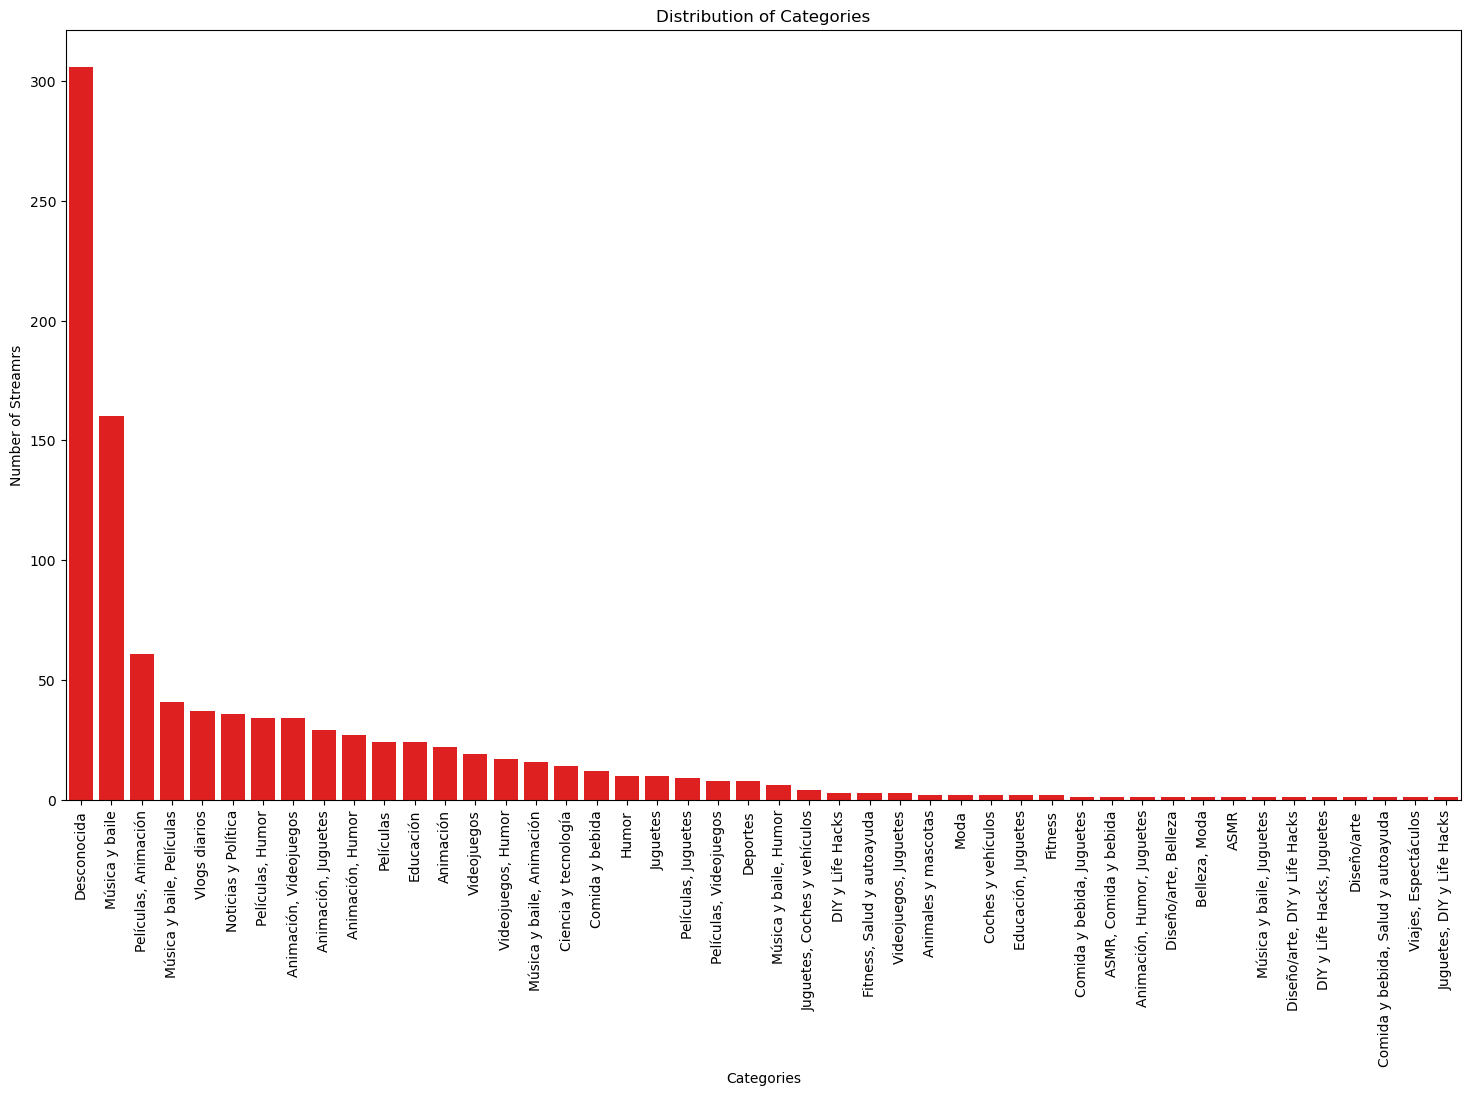

In [13]:
#graphical represent of categories
plt.figure(figsize=(18,10))
sns.barplot(x=category_counts.index,y=category_counts.values,color="red")
plt.title("Distribution of Categories")
plt.xlabel("Categories")
plt.ylabel("Number of Streamrs")
plt.xticks(rotation=90)
plt.show()

Username       1000
Categories     1000
Subscribers       0
Country        1000
Likes             0
Comments          0
Links          1000
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Subscribers  1000 non-null   float64
 1   Likes        1000 non-null   float64
 2   Comments     1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB
None


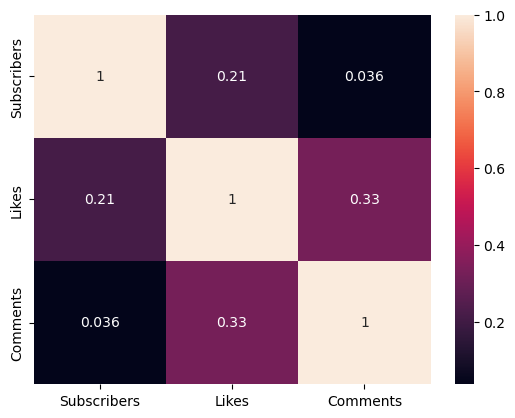

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your original DataFrame
data_sub = data.drop(columns=["Rank", "Visits"])

# Convert all columns to numeric
data_sub = data_sub.apply(pd.to_numeric, errors='coerce')

# Check for NaN values and their counts
print(data_sub.isnull().sum())

# Drop all-NaN columns
data_sub = data_sub.dropna(axis=1, how='all')

# Drop rows with any NaN values or fill them
data_sub = data_sub.dropna()  # or use fillna()

# Check the final DataFrame
print(data_sub.info())

# Create heatmap if there are valid numeric columns left
if not data_sub.empty:
    sns.heatmap(data_sub.corr(), annot=True)
    plt.show()
else:
    print("No valid data to display.")


3. Audience Study

In [15]:
#country
country_counts=data["Country"].value_counts()
country_counts


Country
Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Francia             4
Turquía             4
Arabia Saudita      4
España              4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Perú                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: count, dtype: int64

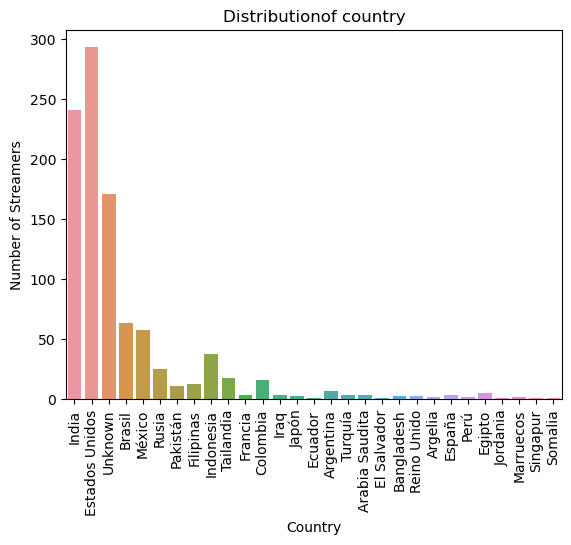

In [16]:
#graphical distribution
sns.countplot(x="Country",data=data)
plt.title("Distributionof country")
plt.ylabel("Number of Streamers")
plt.xticks(rotation=90)
plt.show()

In [17]:
category_counts=data.groupby(["Country","Categories"])["Username"].count().unstack().fillna(0)
category_counts

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,Películas,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos","Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios
Country,,,,,,,,,,,,,,,,,,,,,
Arabia Saudita,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argelia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Brasil,0.0,0.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,...,2.0,12.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
Colombia,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Ecuador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Egipto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
El Salvador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


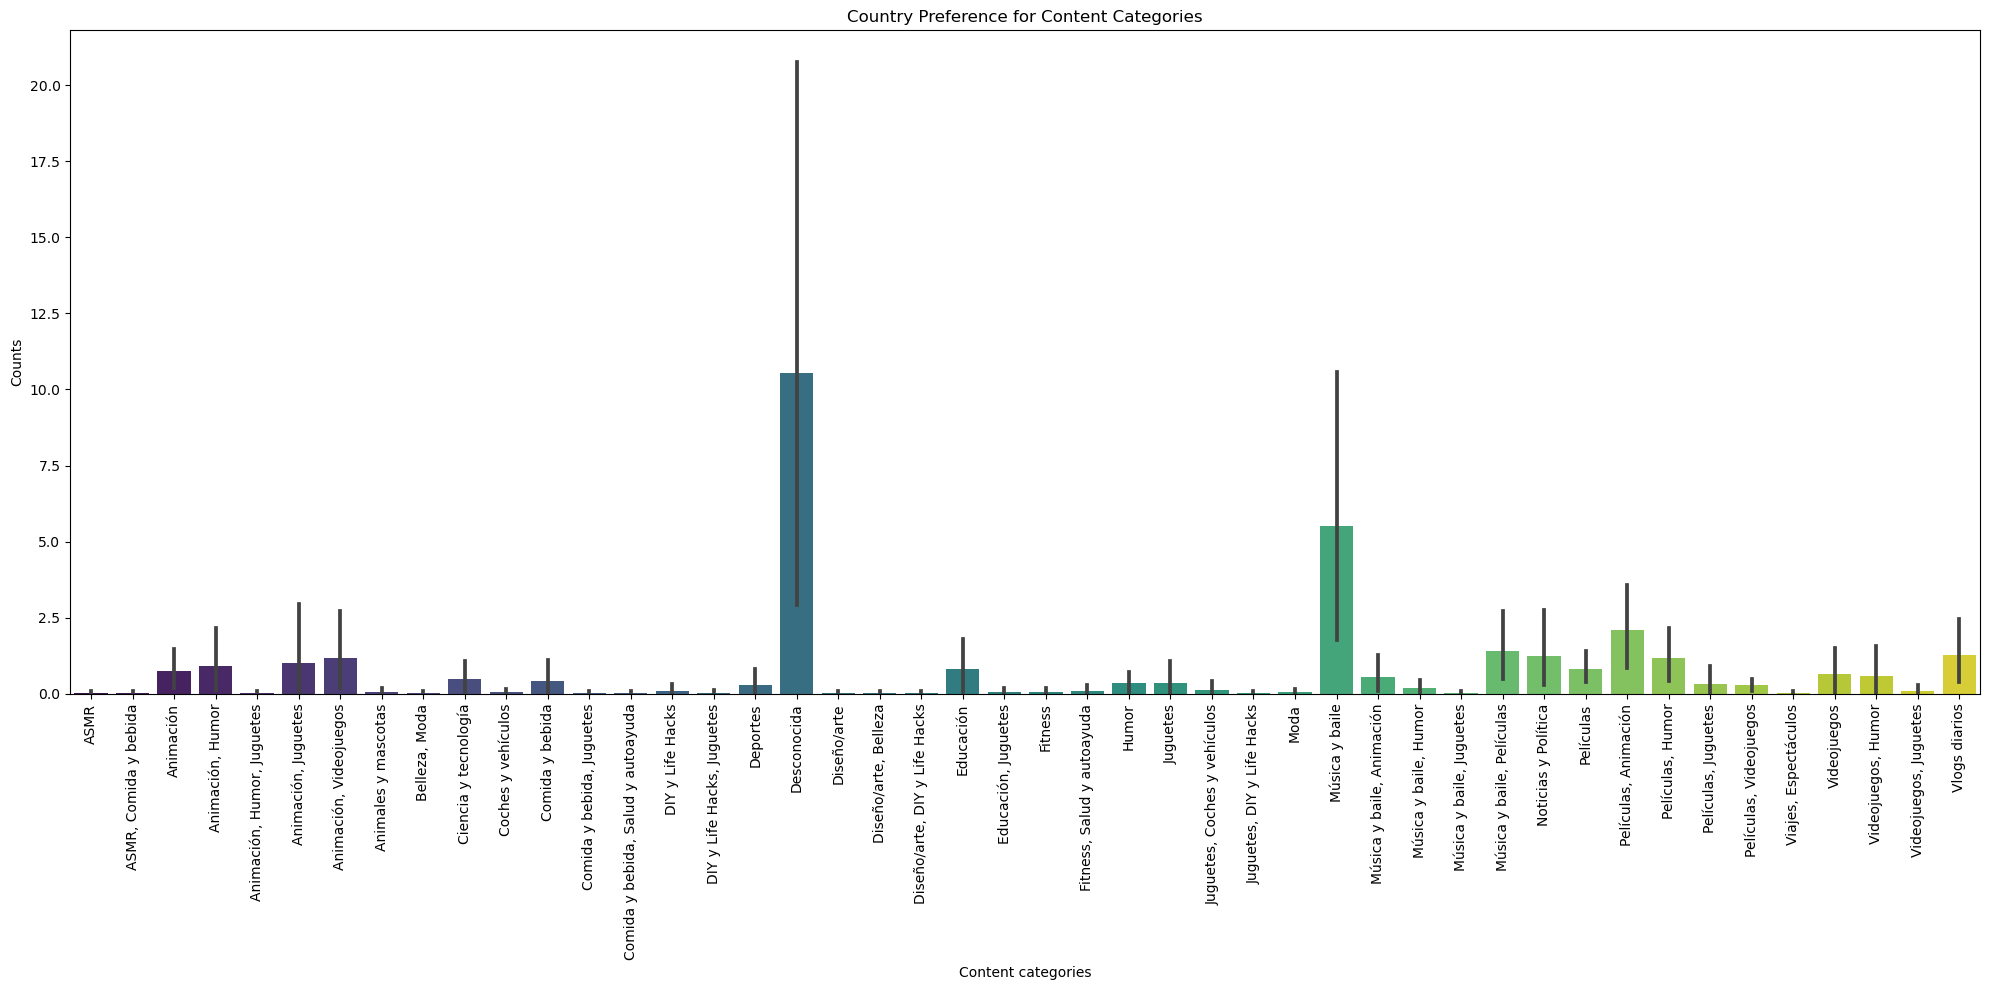

In [18]:
#Assuming you already have the category_counts DataFrame
plt.figure(figsize=(20,10))
sns.barplot(data=category_counts,palette='viridis')
plt.title('Country Preference for Content Categories')
plt.xlabel('Content categories')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

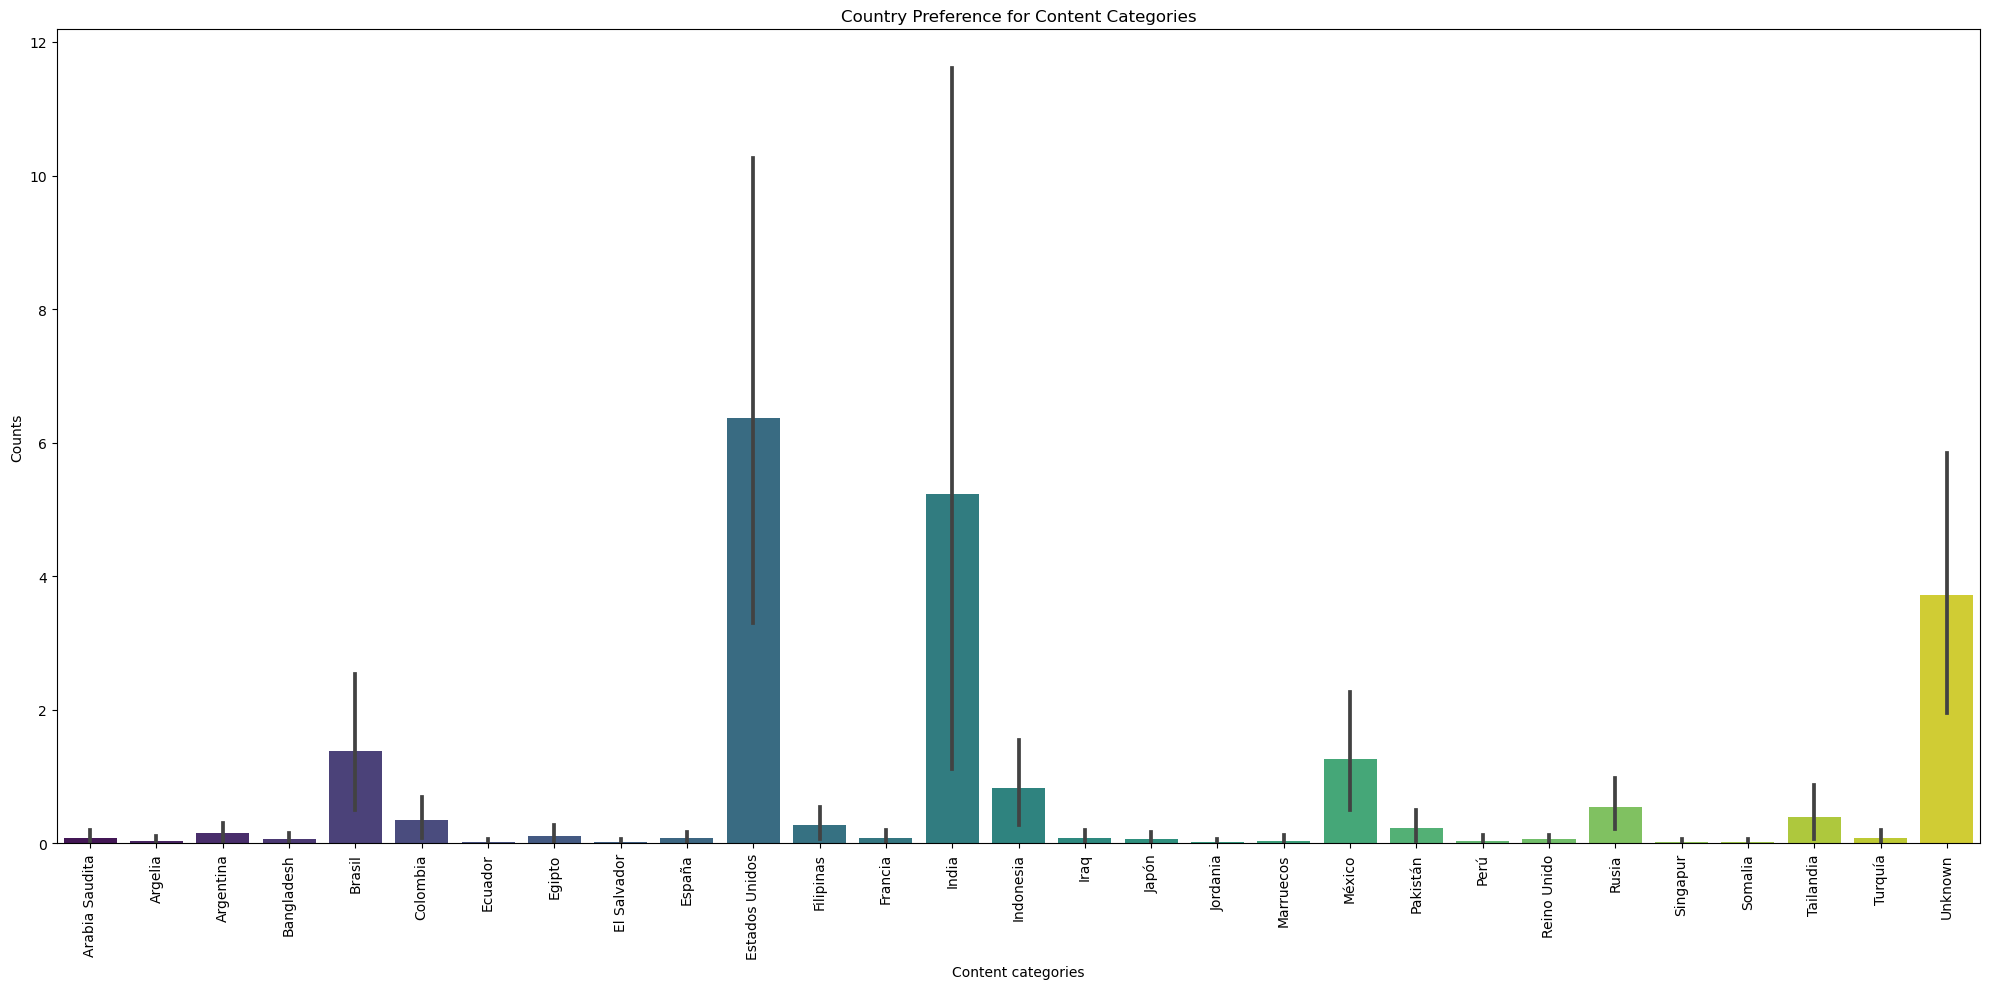

In [19]:
#reshaping tha dataframe
category_counts=category_counts.transpose()
plt.figure(figsize=(20,10))
sns.barplot(data=category_counts,palette='viridis')
plt.title('Country Preference for Content Categories')
plt.xlabel('Content categories')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

4.Perfomance Metrics

The Average Number Of Subscriber is :  21894400.0
The Average Number Of Visits is :  1209446.3155
The Average Number Of Likes is :  53632.592
The Average Number Of Comments is :  1288.768


Text(0.5, 0, 'Metrics')

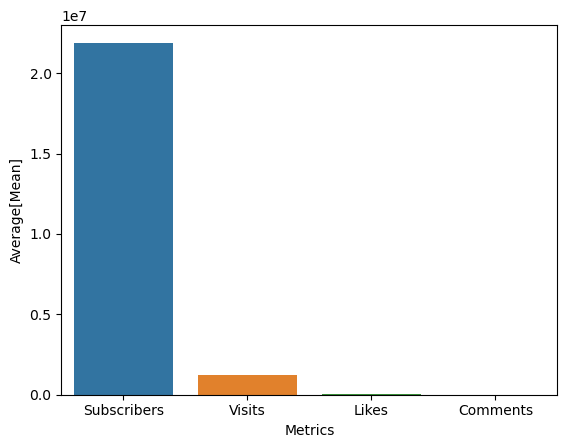

In [20]:
#AVERAGE METRICS CALCULATION
avg_subscribers=data["Subscribers"].mean()
avg_visits=data["Visits"].mean()
avg_likes=data["Likes"].mean()
avg_comment=data["Comments"].mean()
#output
print("The Average Number Of Subscriber is : ",avg_subscribers)
print("The Average Number Of Visits is : ",avg_visits)
print("The Average Number Of Likes is : ",avg_likes)
print("The Average Number Of Comments is : ",avg_comment)

#VISUALISATION
sns.barplot(x=["Subscribers","Visits","Likes","Comments"],y=[avg_subscribers,avg_visits,avg_likes,avg_comment])
plt.ylabel("Average[Mean]")
plt.xlabel("Metrics")

5.Content Categories

Categories
Desconocida                           306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor  

AttributeError: Text.set() got an unexpected keyword argument 'rotations'

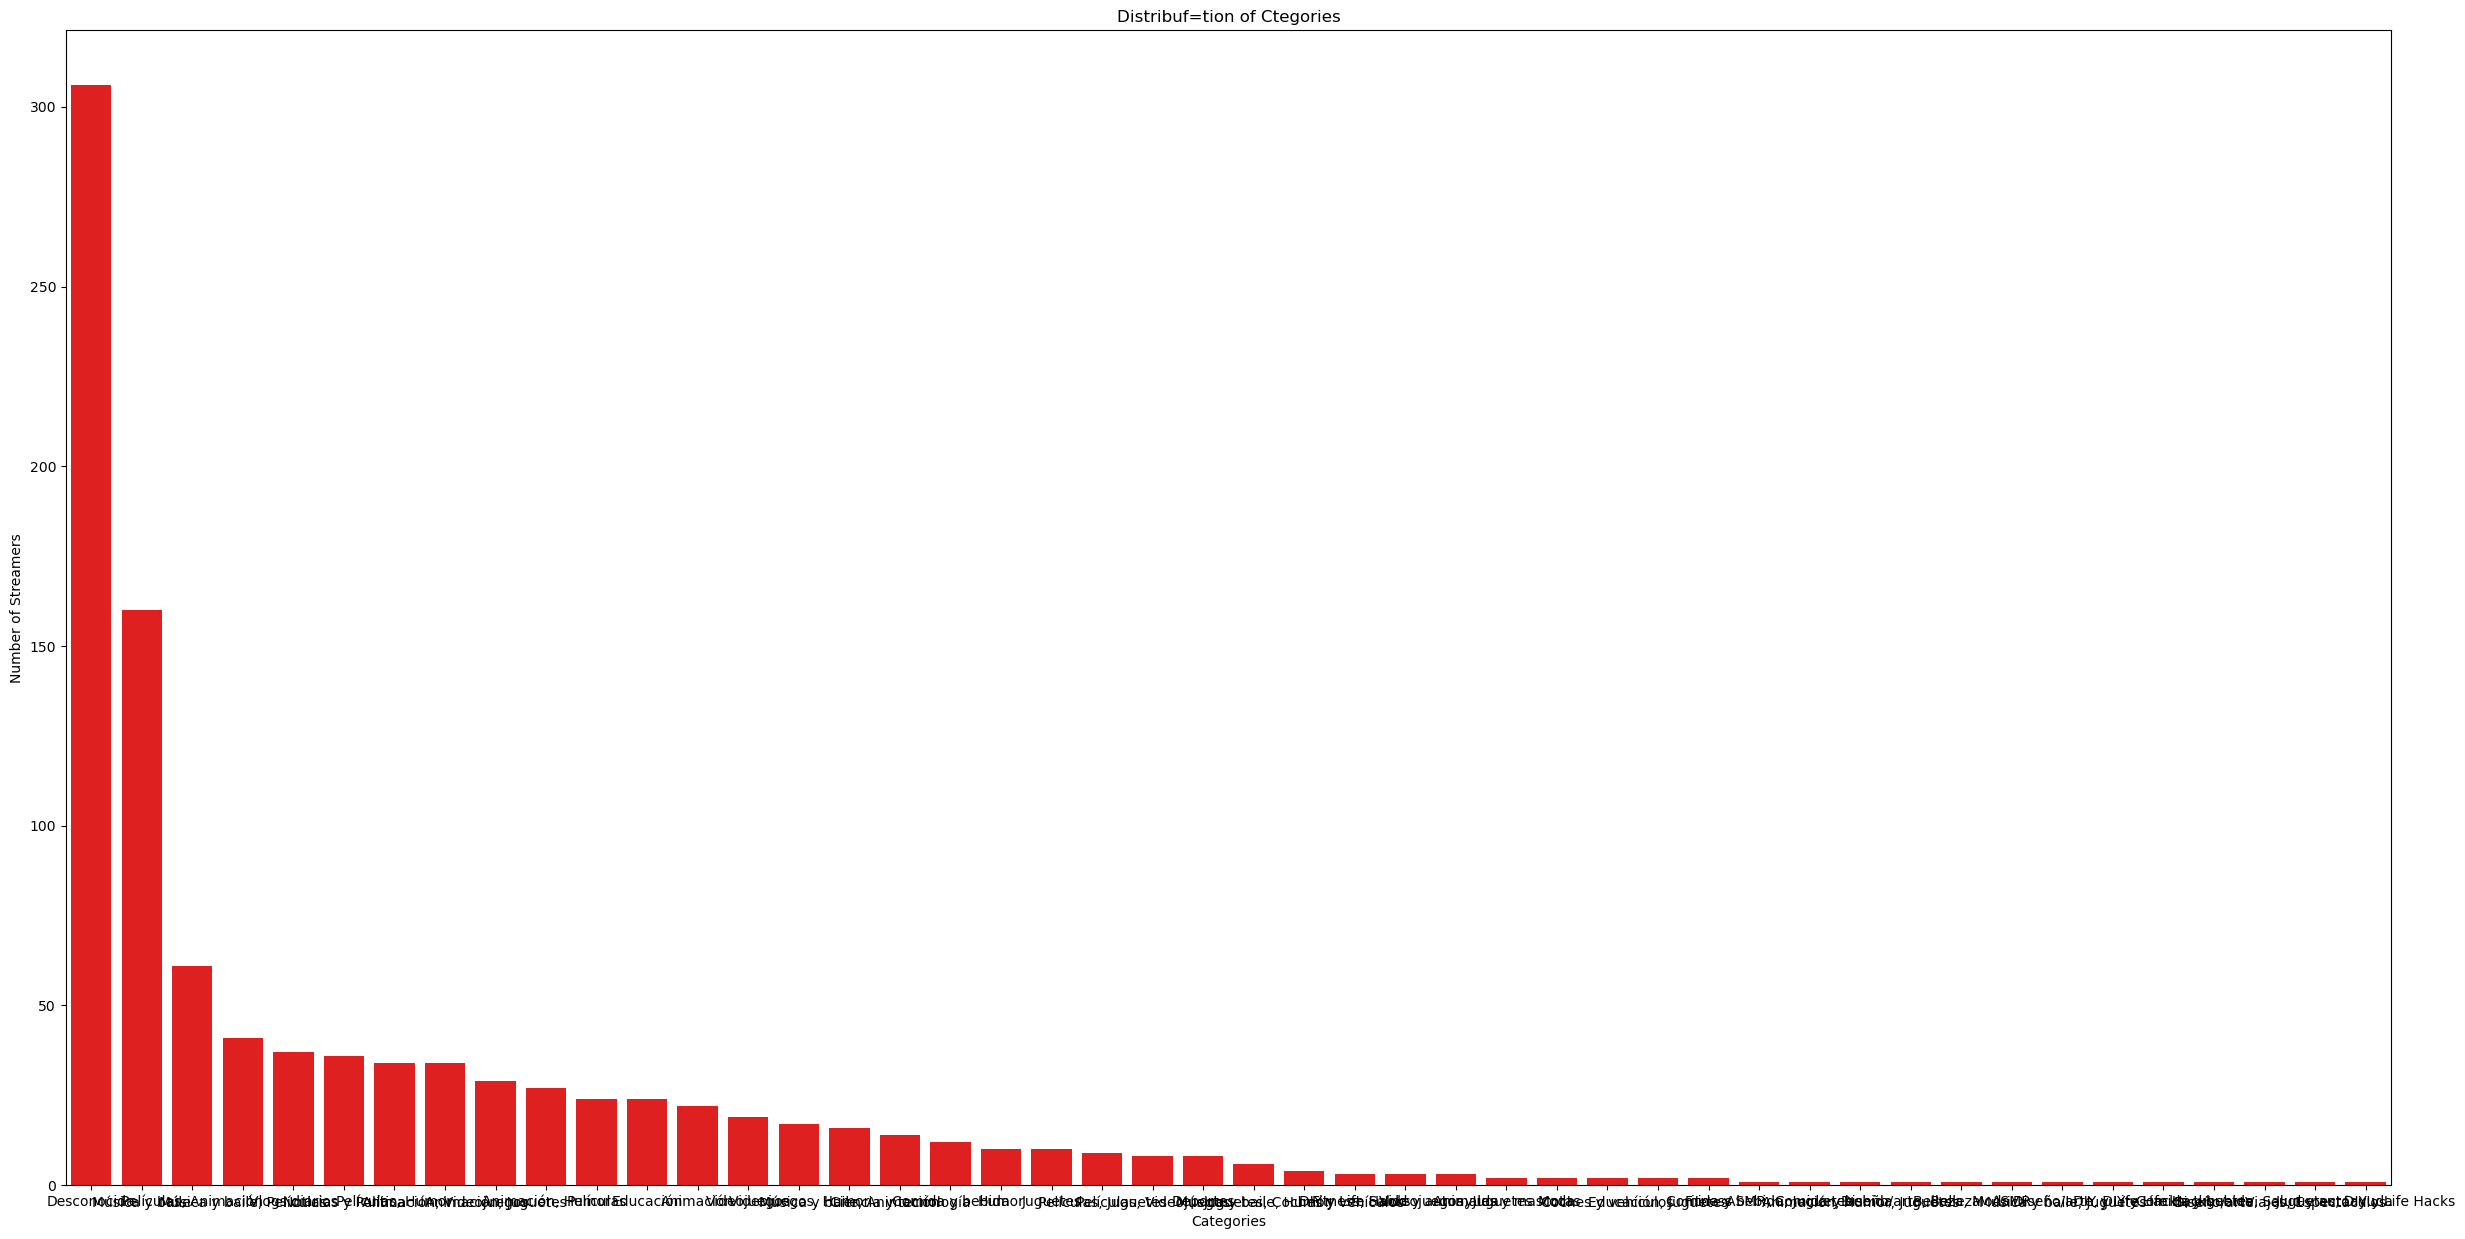

In [21]:
#Value count of the content categories
category_counts = data["Categories"].value_counts()
print(category_counts)
#Graphical representationn of the value count of the content categories
plt.figure(figsize=(30,15))
sns.barplot(x=category_counts.index,y=category_counts.values,color="red")
plt.title("Distribuf=tion of Ctegories")
plt.xlabel("Categories")
plt.ylabel("Number of Streamers")
plt.xticks(rotations=90)
plt.show()

In [ ]:
category_count=data["Categories"].value_counts()
categories_with_streamers_above_30=category_count[category_count>30]
print("categories with streamers above 30")
print(categories_with_streamers_above_30)

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(x=categories_with_streamers_above_30.index,y=categories_with_streamers_above_30.values)
plt.title("Categories with Streamers above 30 ")
plt.xlabel("Categories")
plt.ylabel("Number Of streamers")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Performance metrics to analyze
performance_metrics = ["Subscribers", "Visits", "Likes", "Comments"]
exceptional_categories_by_metric = {metric: [] for metric in performance_metrics}

# Calculate z-scores and find exceptional categories
for metric in performance_metrics:
    z_scores = (data[metric] - data[metric].mean()) / data[metric].std()
    exceptional_categories = data[z_scores.abs() > 2]["Categories"].unique()
    exceptional_categories_by_metric[metric] = set(exceptional_categories)  # Store as a set for easier comparison

# Find categories that are exceptional across all metrics
exceptional_categories_across_metrics = set.intersection(*exceptional_categories_by_metric.values())

# Print the exceptional categories
print(f'Categories exceptional across all metrics: {", ".join(exceptional_categories_across_metrics)}')


6.Brands and Collaborations

In [ ]:
#Define thresholds for high and low perfomance based on qualities
high_subscriber=data["Subscribers"].quantile(0.75,interpolation="nearest")
high_likes=data["Likes"].quantile(0.75,interpolation="nearest")
high_comments=data["Comments"].quantile(0.75,interpolation="nearest")

low_subscriber=data["Subscribers"].quantile(0.25,interpolation="nearest")
low_likes=data["Likes"].quantile(0.25,interpolation="nearest")
low_comments=data["Comments"].quantile(0.25,interpolation="nearest")
#High perfomance and low perfomance
data["HighPerfomance"]=((data["Subscribers"]>=high_subscriber)&
                       (data["Likes"]>=high_likes)&
                       (data["Comments"]>=high_comments))
data["LowPerfomance"]=((data["Subscribers"]>=low_subscriber)&
                       (data["Likes"]>=low_likes)&
                       (data["Comments"]>=low_comments))
#Engagement based on likes and comment
data["Engagement"]=data["Likes"]+data["Comments"]
high_perfomance=data[data["HighPerfomance"]]["Engagement"].sum()
low_perfomance=data[data["LowPerfomance"]]["Engagement"].sum()
#BARPLOT of high perfomance and low perfomance
plt.figure(figsize=(18,12))
sns.barplot(x=["HighPerfomance","LowPerfomance"],y=[high_perfomance,low_perfomance])
plt.title("Comparision of Enagagement between High and Low perfoming Stremaers")
plt.xlabel("Perfomance")
plt.ylabel("Total Engagement")
plt.show()

In [ ]:
data.head()

In [ ]:
# Check existing columns
print(data.columns)

# Drop the 'Links' column if it exists
data.drop(columns=["Links"], inplace=True, errors='ignore')

# Display the updated DataFrame
data.head()


7.Benchmarking

In [22]:
#Metrics above their Average
data["Above_Avg_Subscribers"]=data["Subscribers"]>avg_subscribers
data["Above_Avg_Visits"]=data["Visits"]>avg_visits
data["Above_Avg_Likes"]=data["Likes"]>avg_likes
data["Above_Avg_Comments"]=data["Comments"]>avg_comment
#Top perfoming streamers intern of metrics above average
top_performing_streamers=data[data["Above_Avg_Subscribers"]&
                             data["Above_Avg_Visits"]&
                             data["Above_Avg_Likes"]&
                             data["Above_Avg_Comments"]]
print("Top performing Creators : The identification of the top performers based on subscribers, visits, likes, and comments.")
top_performing_streamers

Top performing Creators : The identification of the top performers based on subscribers, visits, likes, and comments.


,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,Above_Avg_Subscribers,Above_Avg_Visits,Above_Avg_Likes,Above_Avg_Comments
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,True,True,True,True
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,True,True,True,True
26,27,dudeperfect,Videojuegos,59700000.0,Estados Unidos,5300000.0,156500.0,4200.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...,True,True,True,True
34,35,TaylorSwift,Música y baile,54100000.0,Estados Unidos,4300000.0,300400.0,15000.0,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...,True,True,True,True
39,40,JuegaGerman,"Películas, Animación",48600000.0,México,2000000.0,117100.0,3000.0,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...,True,True,True,True
43,44,A4a4a4a4,"Animación, Humor",47300000.0,Rusia,9700000.0,330400.0,22000.0,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...,True,True,True,True
58,59,Mikecrack,"Películas, Animación",43400000.0,México,2200000.0,183400.0,1800.0,http://youtube.com/channel/UCqJ5zFEED1hWs0KNQC...,True,True,True,True
62,63,KimberlyLoaiza,Música y baile,42100000.0,México,5300000.0,271300.0,16000.0,http://youtube.com/channel/UCQZfFRohQ7UX-0CdXl...,True,True,True,True
64,65,luisitocomunica,Desconocida,41100000.0,México,2500000.0,128900.0,1800.0,http://youtube.com/channel/UCECJDeK0MNapZbpaOz...,True,True,True,True
70,71,JessNoLimit,"Películas, Animación",39600000.0,Indonesia,1300000.0,73500.0,1600.0,http://youtube.com/channel/UCvh1at6xpV1ytYOAzx...,True,True,True,True


8.Content Recomendation

In [25]:
user_item_matrix=data.pivot_table(index="Username",columns="Categories",values="Subscribers",fill_value=0)
user_item_matrix

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,Películas,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos","Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios
Username,,,,,,,,,,,,,,,,,,,,,
-genevievesplayhouse1465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GOSpanish,0,0,13900000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GO_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1MILLION_Dance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1theK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeetv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zeetvtelugu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zhong,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
cosine_sim=cosine_similarity(user_item_matrix)

def get_recommendations(username,cosine_sim=cosine_sim):
    idx=user_item_matrix.index.get_loc(username)
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,key=lambda x:x[1], reverse=True)
    sim_scores=sim_scores[1:21]
    streamer_indices=[i[0] for i in sim_scores]
    return user_item_matrix.index[streamer_indices]

recommended_streamers=get_recommendations("tseries")
recommended_streamers

Index(['5MinuteCraftsDIY', '7clouds', 'AadishaktiFilms', 'AdexeyNau', 'Akon',
       'ArianaGrande', 'AvrilLavigne', 'BLACKPINK', 'BTS', 'BillieEilish',
       'BispoBrunoLeonardo', 'BlackEyedPeas', 'BollywoodClassics', 'CNCOMusic',
       'CalvinHarris', 'CalvinHarrisVEVO', 'ChainsmokersVEVO', 'ChrisBrownTV',
       'ConorMaynard', 'DJSnake'],
      dtype='object', name='Username')